In [1]:
import matplotlib as mpl
import numpy as np
mpl.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
import pandas as pd
import re 
summary_data = pd.read_pickle('data/summary.pickle')

Find all columns with score

In [3]:
metrics_columns = [f for f in summary_data.columns if not re.match(r"(?:fold|model|data|preproc)", f)]
features_columns = [f for f in summary_data.columns if re.match(r"(?:fold|model|data|preproc)", f)]
print(metrics_columns, features_columns)

['mean_absolute_error', 'mean_squared_error'] ['folds_name', 'folds_params', 'data_fname', 'model_name', 'model_params', 'preproc_name', 'preproc_params']


Find mean, max, min, std for metrics

In [4]:
%time
for k in metrics_columns:
    summary_data[str(k) + "_mean"] = summary_data[str(k)].apply(pd.Series).mean(axis=1)
    summary_data[str(k) + "_min"] = summary_data[str(k)].apply(pd.Series).min(axis=1)
    summary_data[str(k) + "_max"] = summary_data[str(k)].apply(pd.Series).max(axis=1)
    summary_data[str(k) + "_std"] = summary_data[str(k)].apply(pd.Series).std(axis=1)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


In [5]:
summary_data.head(13)

,mean_absolute_error,mean_squared_error,folds_name,folds_params,data_fname,model_name,model_params,preproc_name,preproc_params,mean_absolute_error_mean,mean_absolute_error_min,mean_absolute_error_max,mean_absolute_error_std,mean_squared_error_mean,mean_squared_error_min,mean_squared_error_max,mean_squared_error_std
0,"[0.13506265113047597, 0.06262323065552083, 0.0...","[0.018901424255409204, 0.005633742371936817, 0...",KFold,{'n_splits': 4},../../data/train_short_processed.h5,LinearRegression,{'n_jobs': '-1'},NaN,NaN,0.104329,0.062623,0.142639,0.040410,0.015635,0.005634,0.021337,0.006935
0,"[0.09636461241732003, 0.0736215527428248]","[0.016955747225976866, 0.008294939230576929]",RepeatedKFold,"{'n_splits': 2, 'n_repeats': 1}",../../data/train_short_processed.h5,LinearRegression,{'n_jobs': '-1'},NaN,NaN,0.084993,0.073622,0.096365,0.016082,0.012625,0.008295,0.016956,0.006124


In [6]:
summary_data['mean_absolute_error']

0    [0.13506265113047597, 0.06262323065552083, 0.0...
0            [0.09636461241732003, 0.0736215527428248]
Name: mean_absolute_error, dtype: object

combine model's detail in one column

In [7]:
def unit_data(x):
    x_all = ''
    for x_i in x:
        if x_i != 'nan':
            x_all += x_i
            x_all += '\n'
    return x_all        

In [8]:
summary_data['label'] = summary_data[features_columns].astype(str).apply(unit_data,1)

sort dataframe by mean value

In [9]:
sort_summary_data = summary_data.sort_values(by=['mean_squared_error_mean'], ascending=True)

# MAE metric 

In [10]:
metric_mae = sort_summary_data['mean_absolute_error'].apply(pd.Series).fillna(0).values
r_metric_mae = [list(x) for x in zip(*metric_mae)]

/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1]), <a list of 2 Text xticklabel objects>)

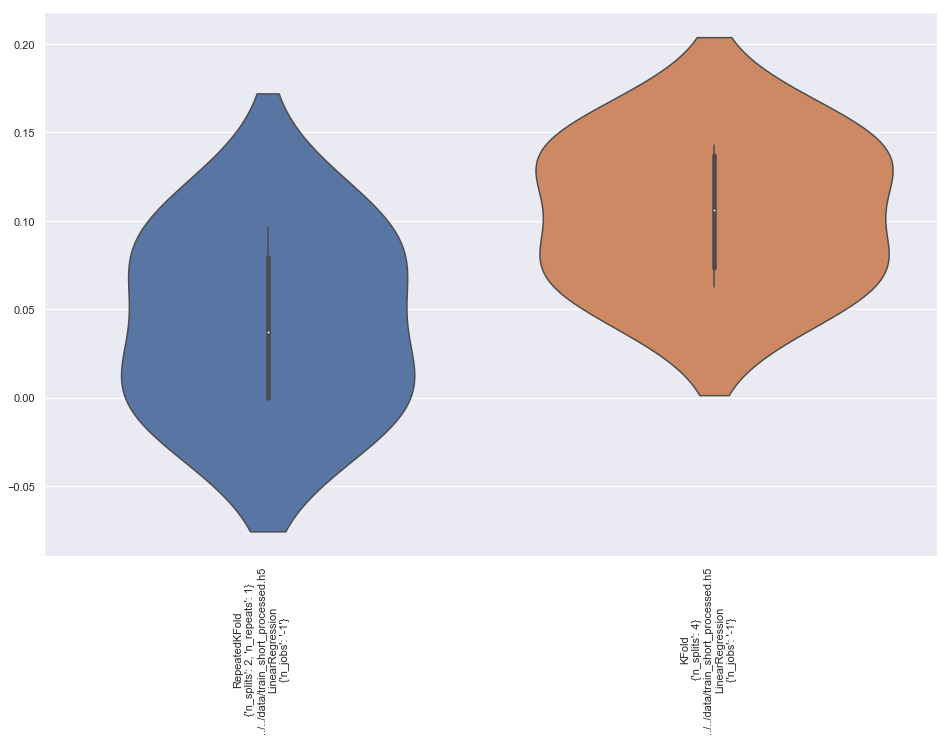

In [11]:
sns.set(rc={'figure.figsize':(16,10)})
# Show each distribution with violins
ax = sns.violinplot(data=np.array(r_metric_mae))
ax.set_xticklabels(sort_summary_data['label'].values)
plt.xticks(rotation=90)

# RMSE metric 

In [ ]:
metric_rmse = sort_summary_data['mean_squared_error'].apply(pd.Series).fillna(0).values
r_metric_rmse = [list(x) for x in zip(*metric_rmse)]

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
# Show each distribution with violins
ax = sns.violinplot(data=np.array(r_metric_rmse))
ax.set_xticklabels(sort_summary_data['label'].values)
plt.xticks(rotation=90)